<a href="https://colab.research.google.com/github/kartiksharma2383/Machine-Learning/blob/main/Time_Series_Forecasting(ARIMA_and_ARIMAX)_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Time Series Forecasting (It is about predicting future values of a sequence (time-ordered data) based on its past patterns and external factors)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("/content/AirPassengers(ML - Time Series Forecasting dataset).csv", parse_dates=['Month'], index_col='Month')
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
y = data['#Passengers']

In [ ]:
# exogenous variable (for ARIMAX)
# len(y): This calculates the number of observations (rows) in the y Series (which contains the #Passengers data).
# range(1, len(y)+1): This creates a sequence of numbers starting from 1 and going up to the total number of observations. This sequence represents a simple counter for each month.
# {'MonthNum': ...}: This creates a Python dictionary where the key is 'MonthNum' and the value is the sequence of numbers generated by range().
# index = y.index: This sets the index of the new exog DataFrame to be the same as the index of the y Series, cause index of y is the Month column (which is a datetime index), the exog DataFrame will also have a datetime index.
exog = pd.DataFrame({'MonthNum': range(1, len(y)+1)}, index = y.index)
use_arimax = True   # True -> ARIMAX, False -> ARIMA
if not use_arimax:
    exog = None

In [ ]:
# train, test = y[:-12], y[-12:]: This line splits the y Series into two parts: train and test, y[:-12] selects all elements of y except for the last 12 as training data. y[-12:] selects the last 12 elements of y as testing data.
# train_exog = exog[:-12] if exog is not None else None: This line splits the exog DataFrame (the exogenous variable data) into a training set train_exog.
# If exog is not None, exog[:-12] is executed, which selects all rows of exog except the last 12 and if exog is None, train_exog is set to None.
# If exog is not None, exog[-12:] is executed, which selects the last 12 rows of exog, if exog is None, test_exog is set to None.
train, test = y[:-12], y[-12:]
train_exog = exog[:-12] if exog is not None else None
test_exog = exog[-12:] if exog is not None else None

In [ ]:
# order(p, d, q): Order for ARIMA model
# p (the first number, which is 2 in this case): This is the order of the Autoregressive (AR) part of the model. It represents the number of lag observations included in the model, p of 2 means that the model will use the previous 2 time periods values to predict the current value.
# d (the second number, which is 1 in this case): This is the order of the Integrated (I) part of the model. It represents the number of times the raw observations are differenced to make the time series stationary. A d of 1 means that the model will take the difference between consecutive observations once to remove trends or seasonality.
# q (the third number, which is 2 in this case): This is the order of the Moving Average (MA) part of the model. It represents the number of lag forecast errors included in the model. A q of 2 means that the model will use the errors from the previous 2 time periods' forecasts to improve the current forecast.
# order = order: This specifies the order of the non-seasonal ARIMA components. The order variable was previously defined as (2, 1, 2), so we are telling the model to use an AR(2), I(1), and MA(2) configuration.
# exog = train_exog: This specifies the exogenous variable data to be used during training.
order = (2, 1, 2)  # You can tune this
model = ARIMA(train, order = order, exog = train_exog)
result = model.fit()
print(result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -603.341
Date:                Thu, 18 Sep 2025   AIC                           1218.683
Time:                        13:26:46   BIC                           1235.934
Sample:                    01-01-1949   HQIC                          1225.692
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
MonthNum       2.6519      0.802      3.305      0.001       1.079       4.224
ar.L1          1.6430      0.028     57.902      0.000       1.587       1.699
ar.L2         -0.9129      0.027    -33.337      0.0

In [ ]:
# pred = result.predict(...): This calls the predict() method on the result object (which contains the fitted model).
# start = len(train): This specifies the starting point for the predictions, len(train) gives the number of observations in the training set, by this model predict after the end of the training data.
# end = len(y)-1: This specifies the ending point for the predictions. len(y) is the total number of observations in the original y Series. Subtracting 1 gives the index of the last observation.
# typ = 'levels': This argument specifies the type of prediction you want, 'levels' (or 'linear') means you want the predictions in the original units of your time series data (the actual number of passengers).
# exog = test_exog: This provides the exogenous variable data for the prediction period.
# pred.index = test.index: This line assigns the index of the test Series to the pred Series for proper visualization and evaluation becaure it allows us to directly compare predicted values to actual values.
pred = result.predict(start = len(train), end = len(y) - 1, typ = 'levels', exog = test_exog)
pred.index = test.index

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


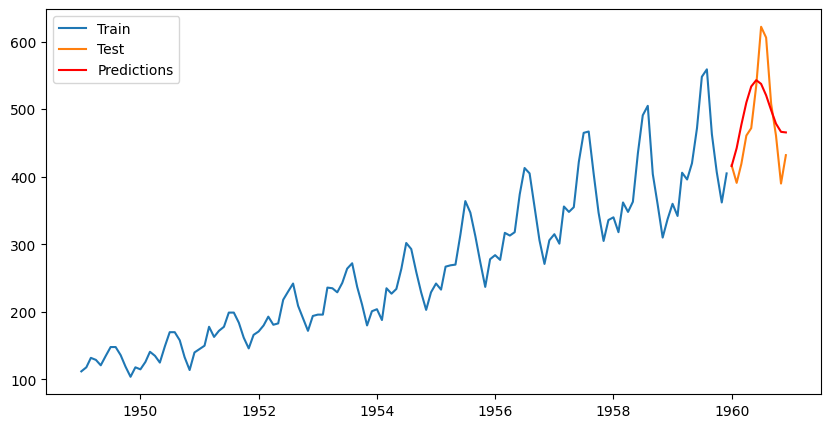

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(pred, label = 'Predictions', color = 'red')
plt.legend()
plt.show()

In [ ]:
print("MSE:", mean_squared_error(test, pred))

MSE: 2839.9213798255955


In [ ]:
# In below code we full entire data not just training data
# order=order: We are using the same (p, d, q) order that we defined earlier.
# exog=exog: We are providing the entire exogenous variable data (exog) to the model, to train final model on available exogenous information.
# forecast_steps = 36: Number of future time periods for which the ARIMA or ARIMAX model will generate predictions.
# len(y): Total number of observations in the original time series data (y).
# len(y) + 1: This is the starting number for the MonthNum sequence in the forecast period. It starts immediately after the last month in the original data.
# len(y) + forecast_steps + 1: This is the ending number for the MonthNum sequence (exclusive). It ensures that the sequence includes forecast_steps number of future months.
# MonthNum: This creates a dictionary entry where 'MonthNum' is the key and the generated sequence of numbers is the value.
# y.index[-1]: This accesses the last date in the original time series data's index (y.index).
# pd.offsets.MonthBegin(): This is a pandas offset object that represents the beginning of a month.
# y.index[-1] + pd.offsets.MonthBegin(): This adds one month to the last date in the original data's index. This calculated date becomes the starting point for the future date range.
# periods = forecast_steps: Specifies the number of dates to generate, which is equal to the number of forecast steps (36 in this case).
# freq = 'MS': Specifies the frequency of the dates, which is 'MS' for Month Start.
final_model = ARIMA(y, order = order, exog = exog).fit()
forecast_steps = 36
forecast_exog = pd.DataFrame({
    'MonthNum': range(len(y) + 1, len(y) + forecast_steps + 1)},
                             index = pd.date_range(start = y.index[-1] + pd.offsets.MonthBegin(),
                                                 periods = forecast_steps, freq = 'MS')) if use_arimax else None

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# steps = forecast_steps: This specifies the number of future time periods for which you want to generate forecasts. In this case, it's 36 months.
# exog = forecast_exog: This argument provides the exogenous variable data for the forecasting period.
# If use_arimax is True, this will be the forecast_exog DataFrame we created with the future month numbers. If use_arimax is False, this will be None.
# y.index[-1]: This gets the last date from the index of your original time series data (y).
# pd.offsets.MonthBegin(): This is a pandas object representing the start of a month.
# y.index[-1] + pd.offsets.MonthBegin(): This calculates the date of the first month after the last date in your original data. This is the starting point for your forecast index.
# periods = forecast_steps: The number of dates to generate, which is equal to the number of forecast steps (36 in this case).
# freq = 'MS': The frequency of the dates, 'MS' stands for Month Start, meaning each date will be the first day of the month.
forecast = final_model.get_forecast(steps = forecast_steps, exog = forecast_exog)
forecast_index = pd.date_range(start = y.index[-1] + pd.offsets.MonthBegin(), periods = forecast_steps, freq = 'MS')
forecast_values = pd.Series(forecast.predicted_mean.values, index = forecast_index)

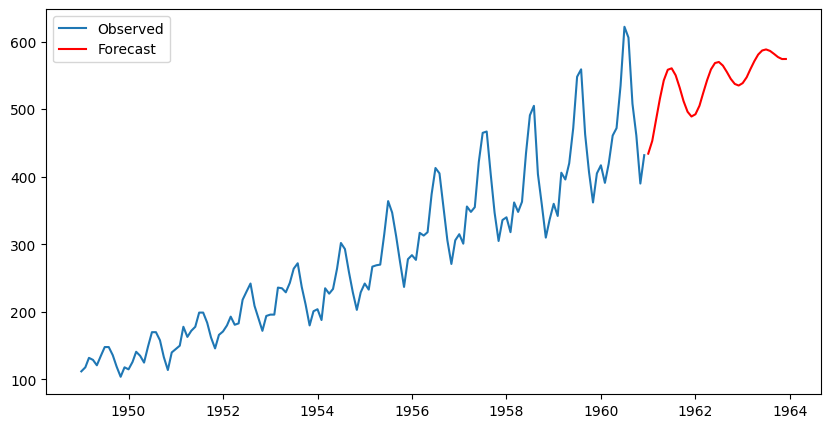

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(y, label = 'Observed')
plt.plot(forecast_values, label = 'Forecast', color = 'red')
plt.legend()
plt.show()